In [99]:
import xmltodict
from bs4 import BeautifulSoup
import pprint
import os
import re
import pandas as pd

import skimage
import matplotlib.pyplot as plt

In [75]:
image_folder = os.path.join(os.getcwd(),'IMAGE_DATA')

In [76]:
image_root = os.path.join(image_folder,os.listdir(image_folder)[0])

In [77]:
image_root_lst = os.listdir(image_root)

In [78]:

r = re.compile('(Index)')
# re.findall(r,image_root_lst)
idx_file = list(filter(r.findall,image_root_lst))[0]


In [79]:
with open(os.path.join(image_root,idx_file),'r') as f:
    index_xml = f.read()

In [80]:
idx_xml = BeautifulSoup(index_xml,'xml')

In [81]:
# ind_file.find('<Col>'==22)
# ind_file.find_all('Wells', {'Col': [22]})

In [82]:
idx_dict = xmltodict.parse(index_xml)

In [83]:
# pprint.pprint(idx_dict['EvaluationInputData'])

In [84]:
idx_dict['EvaluationInputData'].keys()

dict_keys(['@Version', '@xmlns', '@xmlns:xsd', '@xmlns:xsi', 'User', 'InstrumentType', 'Plates', 'Wells', 'Maps', 'Images'])

In [85]:
mod_well_lst_to_df = []

for cnt in range(len(idx_dict['EvaluationInputData']['Wells']['Well'])):
    well_temp_df = pd.DataFrame.from_dict(idx_dict['EvaluationInputData']['Wells']['Well'][cnt],orient='columns')
    well_temp_df['Image'] = [item.pop('@id') for item in well_temp_df['Image']]
    mod_well_lst_to_df.append(well_temp_df)
    well_table=pd.concat(mod_well_lst_to_df,axis=0)

In [86]:
well_table.reset_index(drop=True,inplace=True)

In [87]:
well_table.head()

,id,Col,Row,SublayoutID,Image
0,0101,1,1,1,0101K1F1P1R1
1,0101,1,1,1,0101K1F1P1R2
2,0101,1,1,1,0101K1F2P1R1
3,0101,1,1,1,0101K1F2P1R2
4,0101,1,1,1,0101K1F3P1R1


In [88]:
#channelID 1 = HOECHST
#channelID 2 = mCherry
image_table = pd.DataFrame.from_dict(idx_dict['EvaluationInputData']['Images']['Image'],orient='columns')
image_table.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL
0,0101K1F1P1R1,None,1,1,1,1,1,1,1,1,2022-11-15T22:28:38.0496000Z,"{'@Unit': 'm', '#text': '0.1349009528967997'}",0,r01c01-1719728043.tiff
1,0101K1F1P1R2,None,1,1,2,1,1,1,1,1,2022-11-15T22:28:38.6892000Z,"{'@Unit': 'm', '#text': '0.1349009528967997'}",0.639600038528,r01c01-1299190045.tiff
2,0101K1F2P1R1,None,1,1,1,2,1,1,1,1,2022-11-15T22:28:39.4380000Z,"{'@Unit': 'm', '#text': '0.1349040863366522'}",1.38840007782,r01c01-0436032609.tiff
3,0101K1F2P1R2,None,1,1,2,2,1,1,1,1,2022-11-15T22:28:39.9684000Z,"{'@Unit': 'm', '#text': '0.1349040863366522'}",1.91880011559,r01c01-0695440784.tiff
4,0101K1F3P1R1,None,1,1,1,3,1,1,1,1,2022-11-15T22:28:40.8576000Z,"{'@Unit': 'm', '#text': '0.1349020074760486'}",2.80800008774,r01c01-1938356943.tiff


In [89]:
p_ctl_metadata = image_table[image_table['Col']=='22']
p_ctl_metadata.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL
126,0122K1F1P1R1,None,1,22,1,1,1,1,1,1,2022-11-15T22:53:40.6260096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1502.5764091,r01c22-0584869840.tiff
127,0122K1F1P1R2,None,1,22,2,1,1,1,1,1,2022-11-15T22:53:41.1564096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1503.10680914,r01c22-2111396476.tiff
128,0122K1F2P1R1,None,1,22,1,2,1,1,1,1,2022-11-15T22:53:42.4044096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.35480905,r01c22-0165009493.tiff
129,0122K1F2P1R2,None,1,22,2,2,1,1,1,1,2022-11-15T22:53:42.9348096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.88520908,r01c22-2023344791.tiff
130,0122K1F3P1R1,None,1,22,1,3,1,1,1,1,2022-11-15T22:53:43.9020096Z,"{'@Unit': 'm', '#text': '0.13498634681459504'}",1505.85240912,r01c22-1365878811.tiff


In [93]:
p_ctl_metadata['image_root_folder'] = image_root

C:\Users\marfok\AppData\Local\Temp\ipykernel_20260\1373054125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_ctl_metadata['image_root_folder'] = image_root


In [94]:
p_ctl_metadata.head()

,id,State,Row,Col,ChannelID,FieldID,PlaneID,TimepointID,SequenceID,GroupID,AbsTime,AbsPositionZ,MeasurementTimeOffset,URL,image_root_folder
126,0122K1F1P1R1,None,1,22,1,1,1,1,1,1,2022-11-15T22:53:40.6260096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1502.5764091,r01c22-0584869840.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
127,0122K1F1P1R2,None,1,22,2,1,1,1,1,1,2022-11-15T22:53:41.1564096Z,"{'@Unit': 'm', '#text': '0.13498944511922153'}",1503.10680914,r01c22-2111396476.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
128,0122K1F2P1R1,None,1,22,1,2,1,1,1,1,2022-11-15T22:53:42.4044096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.35480905,r01c22-0165009493.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
129,0122K1F2P1R2,None,1,22,2,2,1,1,1,1,2022-11-15T22:53:42.9348096Z,"{'@Unit': 'm', '#text': '0.134989877075187'}",1504.88520908,r01c22-2023344791.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
130,0122K1F3P1R1,None,1,22,1,3,1,1,1,1,2022-11-15T22:53:43.9020096Z,"{'@Unit': 'm', '#text': '0.13498634681459504'}",1505.85240912,r01c22-1365878811.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


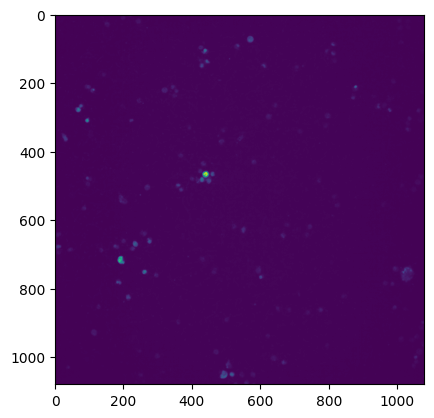

In [101]:
im1 = os.path.join(p_ctl_metadata['image_root_folder'].iloc[0],p_ctl_metadata['URL'].iloc[0])
plt.imshow(skimage.io.imread(im1))

In [102]:
trim_pctl = p_ctl_metadata[['id','Row','Col','ChannelID','FieldID','URL','image_root_folder']]
h_df = trim_pctl[trim_pctl.ChannelID.eq('1')] 
m_df = trim_pctl[trim_pctl.ChannelID.eq('2')]

In [103]:
h_df.head()

,id,Row,Col,ChannelID,FieldID,URL,image_root_folder
126,0122K1F1P1R1,1,22,1,1,r01c22-0584869840.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
128,0122K1F2P1R1,1,22,1,2,r01c22-0165009493.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
130,0122K1F3P1R1,1,22,1,3,r01c22-1365878811.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
270,0222K1F1P1R1,2,22,1,1,r02c22-1656980324.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
272,0222K1F2P1R1,2,22,1,2,r02c22-1027735946.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


In [104]:
m_df.head()

,id,Row,Col,ChannelID,FieldID,URL,image_root_folder
127,0122K1F1P1R2,1,22,2,1,r01c22-2111396476.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
129,0122K1F2P1R2,1,22,2,2,r01c22-2023344791.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
131,0122K1F3P1R2,1,22,2,3,r01c22-0711364633.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
271,0222K1F1P1R2,2,22,2,1,r02c22-2137399416.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...
273,0222K1F2P1R2,2,22,2,2,r02c22-0509830294.tiff,c:\Users\marfok\OneDrive - Bristol Myers Squib...


In [ ]:


# # r = re.compile('.*r04c11')
# r = re.compile('(Index)')

# with open (list(filter(r.findall,im_lst))[0],'r') as f:
#     z = f.read()
# z


# import numpy as np
# samp = np.array([21,22,33,4,5,6,7,87])
# mask = np.array([0,0,0,1,1,1,1,0],dtype=bool)
# samp[mask]

